In [1]:
import pandas as pd
import utils
from time import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

### Load Data and Scaler

In [2]:
from sklearn.externals import joblib
scale = joblib.load("models/scaler.sav")

In [3]:
train = pd.read_csv("data/final_data/clean_train.csv")
X,y,c_names = utils.setup_data(train,scale,'Team2_win',names=True)
train.head()

,Team1_first_downs,Team1_passing_first_downs,Team1_rushing_first_downs,Team1_rushing_yds,Team1_rushing_attempts,Team1_passing_attempts,Team1_passing_completions,Team1_passing_interceptions,Team1_avg_per_pass,Team1_pass_yds,...,Team2_third_down_suc,Team2_fourth_down_attempts,Team2_fourth_down_suc,Team1_third_down_conv_pct,Team2_third_down_conv_pct,Team1_fourth_down_conv_pct,Team2_fourth_down_conv_pct,Team1_turnover_margin,Team2_turnover_margin,Team2_win
0,22,14,7,291,48,20,14,0,7.6,152,...,5,3,0,0.428571,0.384615,1.0,0.0,-2,2,0
1,18,3,14,50,34,40,26,1,7.7,307,...,7,1,0,0.352941,0.388889,0.0,0.0,0,0,0
2,29,12,16,164,41,41,27,0,8.1,333,...,4,2,2,0.466667,0.285714,0.0,1.0,-1,1,0
3,25,13,8,234,43,31,14,2,4.7,146,...,5,2,1,0.333333,0.416667,1.0,0.5,2,-2,1
4,14,7,6,201,34,19,10,0,9.8,186,...,8,2,0,0.272727,0.444444,0.0,0.0,-4,4,0


In [4]:
test = pd.read_csv("data/final_data/clean_test.csv")
X_test,y_test = utils.setup_data(test,scale,target_col='Team2_win')
test.head()

,Team1_first_downs,Team1_passing_first_downs,Team1_rushing_first_downs,Team1_rushing_yds,Team1_rushing_attempts,Team1_passing_attempts,Team1_passing_completions,Team1_passing_interceptions,Team1_avg_per_pass,Team1_pass_yds,...,Team2_third_down_suc,Team2_fourth_down_attempts,Team2_fourth_down_suc,Team1_third_down_conv_pct,Team2_third_down_conv_pct,Team1_fourth_down_conv_pct,Team2_fourth_down_conv_pct,Team1_turnover_margin,Team2_turnover_margin,Team2_win
0,29,23,5,453,69,22,13,1,4.4,97,...,5,3,1,0.590909,0.357143,0.666667,0.333333,-2,2,0
1,27,17,5,317,44,45,24,1,2.8,124,...,8,0,0,0.315789,0.666667,1.000000,0.000000,-1,1,1
2,8,4,4,136,27,22,9,0,4.3,95,...,7,2,1,0.166667,0.368421,0.000000,0.500000,1,-1,1
3,21,12,8,293,56,24,13,1,7.0,169,...,6,0,0,0.200000,0.352941,0.666667,0.000000,1,-1,1
4,18,4,12,90,27,51,26,0,5.4,273,...,5,1,1,0.277778,0.333333,0.000000,1.000000,0,0,1


In [5]:
RF=RandomForestClassifier(n_jobs = -1)
params = {
    'n_estimators' : range(10,500),
    'criterion': ['gini','entropy'],
    'max_depth':range(3,10),
    'min_samples_leaf':range(50,200)
}

In [6]:
random_serach = RandomizedSearchCV(RF,params,cv=10,random_state=10,scoring='accuracy',refit = True)

In [7]:
start = time()
random_serach.fit(X,y)
print("RandomizedSearchCV took %.2f seconds." % ((time() - start)))

RandomizedSearchCV took 69.12 seconds.


In [8]:
import utils
utils.report(random_serach.cv_results_,n_top=10)

Model with rank: 1
Mean validation score: 0.876 (std: 0.031)
Parameters: {'n_estimators': 361, 'min_samples_leaf': 61, 'max_depth': 7, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.875 (std: 0.028)
Parameters: {'n_estimators': 272, 'min_samples_leaf': 55, 'max_depth': 9, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.875 (std: 0.028)
Parameters: {'n_estimators': 60, 'min_samples_leaf': 89, 'max_depth': 3, 'criterion': 'entropy'}

Model with rank: 4
Mean validation score: 0.871 (std: 0.031)
Parameters: {'n_estimators': 451, 'min_samples_leaf': 110, 'max_depth': 4, 'criterion': 'entropy'}

Model with rank: 5
Mean validation score: 0.868 (std: 0.026)
Parameters: {'n_estimators': 255, 'min_samples_leaf': 115, 'max_depth': 4, 'criterion': 'gini'}

Model with rank: 6
Mean validation score: 0.867 (std: 0.027)
Parameters: {'n_estimators': 487, 'min_samples_leaf': 102, 'max_depth': 6, 'criterion': 'entropy'}

Model with rank: 7
Mean validation score: 0.865

In [9]:
RF_final=RandomForestClassifier(**random_serach.best_params_,random_state=10)
RF_final.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=61, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=361, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [10]:
pickle.dump(RF_final,open("models/RF_model.sav",'wb'))

In [11]:
y_pred = RF_final.predict(X_test)
y_pred_prob = RF_final.predict_proba(X_test)[:, 1]

In [12]:
print("RF Acc Score: {0:.3%}".format(accuracy_score(y_test,y_pred)))

RF Acc Score: 88.136%


### Importances/ROC Curve

In [13]:
importances = RF_final.feature_importances_
import numpy as np
std = np.std([RF_final.feature_importances_ for tree in RF_final.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [14]:
feature_importances = pd.DataFrame({'name':c_names.columns,
                                    'importance':RF_final.feature_importances_,
                                   'std':np.std([RF_final.feature_importances_ for tree in RF_final.estimators_],axis=0)})

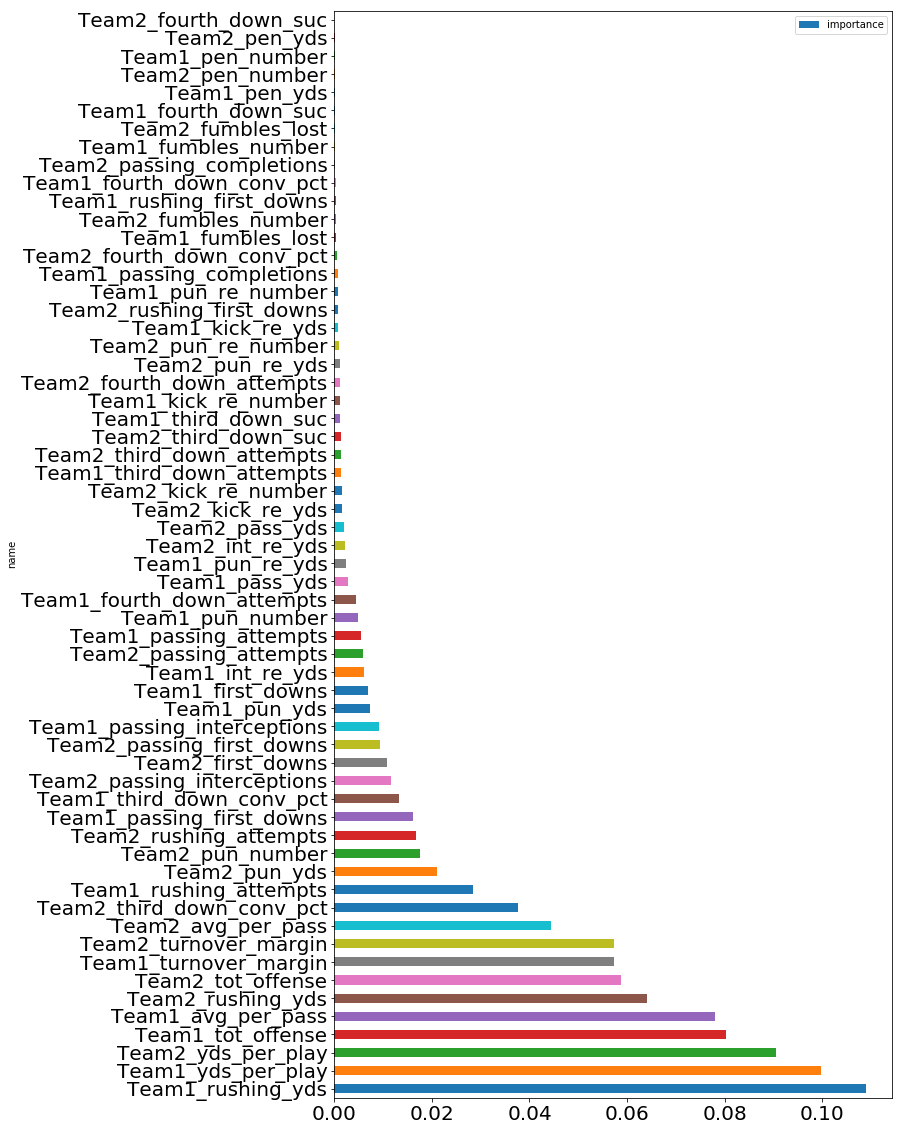

In [15]:
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
feature_importances.sort_values('importance',ascending=False).plot(x='name',y='importance',kind='barh',figsize=(10,20))

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = auc(fpr,tpr)

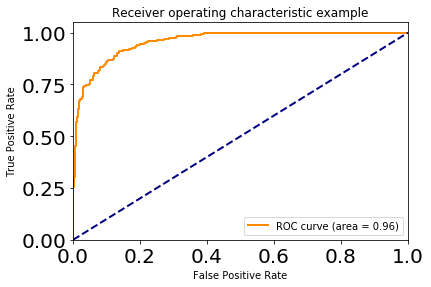

In [17]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()